In [32]:
import numpy as np
import matplotlib.pylab as plt
import matti_func as matti

n=1.5
fs = 15
fss = 12
col = ['blue', 'red', 'green', 'orange', 'purple', 'dimgrey', 'cyan', 'black', 'lime']
lin = ['-', (0,(3,3,1,3)), (0,(1,1)), (5,(10,3)), (0,(3,3,1,3,1,3)), (0,(5,5)), (2,(2,2,5)), (10,(2,2)), (1,(10,10))]
lw = 2  # plt default: 1.5

SAVE = False

# direc = "/home/matti/Documents/data/benchmark_ist/first_try/" #pc dottorato
direc = "/home/mmencagl/tests/isteddas_tests/" 
GPUN = np.array([1, 2, 4, 8])
Ns = np.array([2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144]) # NS = np.array([2**i for i in range(11,19)])
t_units = np.array([0.411051801011542, 0.293267213279994, 0.207987810053051, 0.146584810622429, 0.104578426979942, 0.0732302694978679, 0.0515794849751965, 0.0362838504491639])
M_units = np.array([1322.380429, 2597.900414, 5165.040837, 10398.521243, 20429.856387, 41664.757327, 83983.863922, 169716.028091])

In [2]:
def read_scal_ist(Nstar):
    dname = direc + str(Nstar) + "/"
    err = []
    tprof = []
    for gn in GPUN:
        #questo legge le due colonne t e de/e per ogni numero di gpu. li mette nella lista err
        with open(dname + str(gn) + "gpu/output/diagnostic.dat") as f:
            file = f.readlines()
            file.pop(0)
            err.append(np.loadtxt(file,  usecols=(0,1)))
        #questo legge la penultima riga del time_prof_cumul. le mette nella lista tprof
        with open(dname + str(gn) + "gpu/logfiles/timeprofile.dat.cumul") as f:
            tprof.append(np.loadtxt([f.readlines()[-2]]))
    return err, np.array(tprof)

def name_lenovo(dir, gn, Nstar): return direc + "build_gpu" + str(gn) + "_stars" + str(Nstar) + "/bin/"
def read_scal_ist_lenovo(Nstar, prints=False):
    err = []
    tprof = []
    if(prints): print("(%s)   Nstars = %d;  GPUs: "%(direc,Nstar), end="")
    for gn in GPUN:            
        if(prints): print("%d "%gn, end="")
        dname = name_lenovo(direc, gn, Nstar)
        #questo legge le due colonne t e de/e per ogni numero di gpu. li mette nella lista err
        with open(dname + "output/diagnostic.dat") as f:
            file = f.readlines()
            file.pop(0)
            err.append(np.loadtxt(file,  usecols=(0,1)))
        #questo legge la penultima riga del time_prof_cumul. le mette nella lista tprof
        with open(dname + "logfiles/timeprofile.dat.cumul") as f:
            tprof.append(np.loadtxt([f.readlines()[-2]]))
    if(prints): print()
    return err, np.array(tprof)

lista = []
for ns in Ns:
    lista.append(read_scal_ist_lenovo(ns, True))
#list [idx per Numero di stelle (Ns), lista] [idx per tprof(1), tupla] [idx per Numero di GPU usate (GPUN), idx per argomento profname, matrice np]
#list [idx per Numero di stelle (Ns), lista] [idx per errore(0), tipla] [idx per Numero di GPU usate (GPUN), lista] [matrice Nx2, tempi ed eror, matrice np]

with open(name_lenovo(direc, GPUN[0], Ns[0]) + "logfiles/timeprofile.dat.cumul") as f:
    profname = f.readlines()[-1].strip().split()
for i in range(len(profname)):
    print("{} : {}".format(i,profname[i]))
#print()
# with open(name_lenovo(direc, GPUN[-1], Ns[0]) + "logfiles/timeprofile.dat.cumul") as f:
#     profname2 = f.readlines()[-1].strip().split()
# for i in range(len(profname2)):
#     print("{} : {}".format(i,profname2[i]))

(/home/mmencagl/tests/isteddas_tests/)   Nstars = 2048;  GPUs: 1 2 4 8 
(/home/mmencagl/tests/isteddas_tests/)   Nstars = 4096;  GPUs: 1 2 4 8 
(/home/mmencagl/tests/isteddas_tests/)   Nstars = 8192;  GPUs: 1 2 4 8 
(/home/mmencagl/tests/isteddas_tests/)   Nstars = 16384;  GPUs: 1 2 4 8 
(/home/mmencagl/tests/isteddas_tests/)   Nstars = 32768;  GPUs: 1 2 4 8 
(/home/mmencagl/tests/isteddas_tests/)   Nstars = 65536;  GPUs: 1 2 4 8 
(/home/mmencagl/tests/isteddas_tests/)   Nstars = 131072;  GPUs: 1 2 4 8 
(/home/mmencagl/tests/isteddas_tests/)   Nstars = 262144;  GPUs: 1 2 4 8 
0 : Nsteps
1 : INIT
2 : oldI-forces
3 : EVAL-buildtree
4 : I-forces
5 : ANN-transfers
6 : ANN-treeonly
7 : ANN-searchonly
8 : PERSTEP
9 : ActivePart
10 : AdvanceStep
11 : predictor
12 : evaluation
13 : EVAL-kernelI
14 : EVAL-kernelN
15 : EVAL-acc3corr
16 : EVAL-read
17 : EVAL-mpi-red
18 : EVAL-mpi-gat
19 : corrector
20 : UpdateDT
21 : REsynch
22 : prints


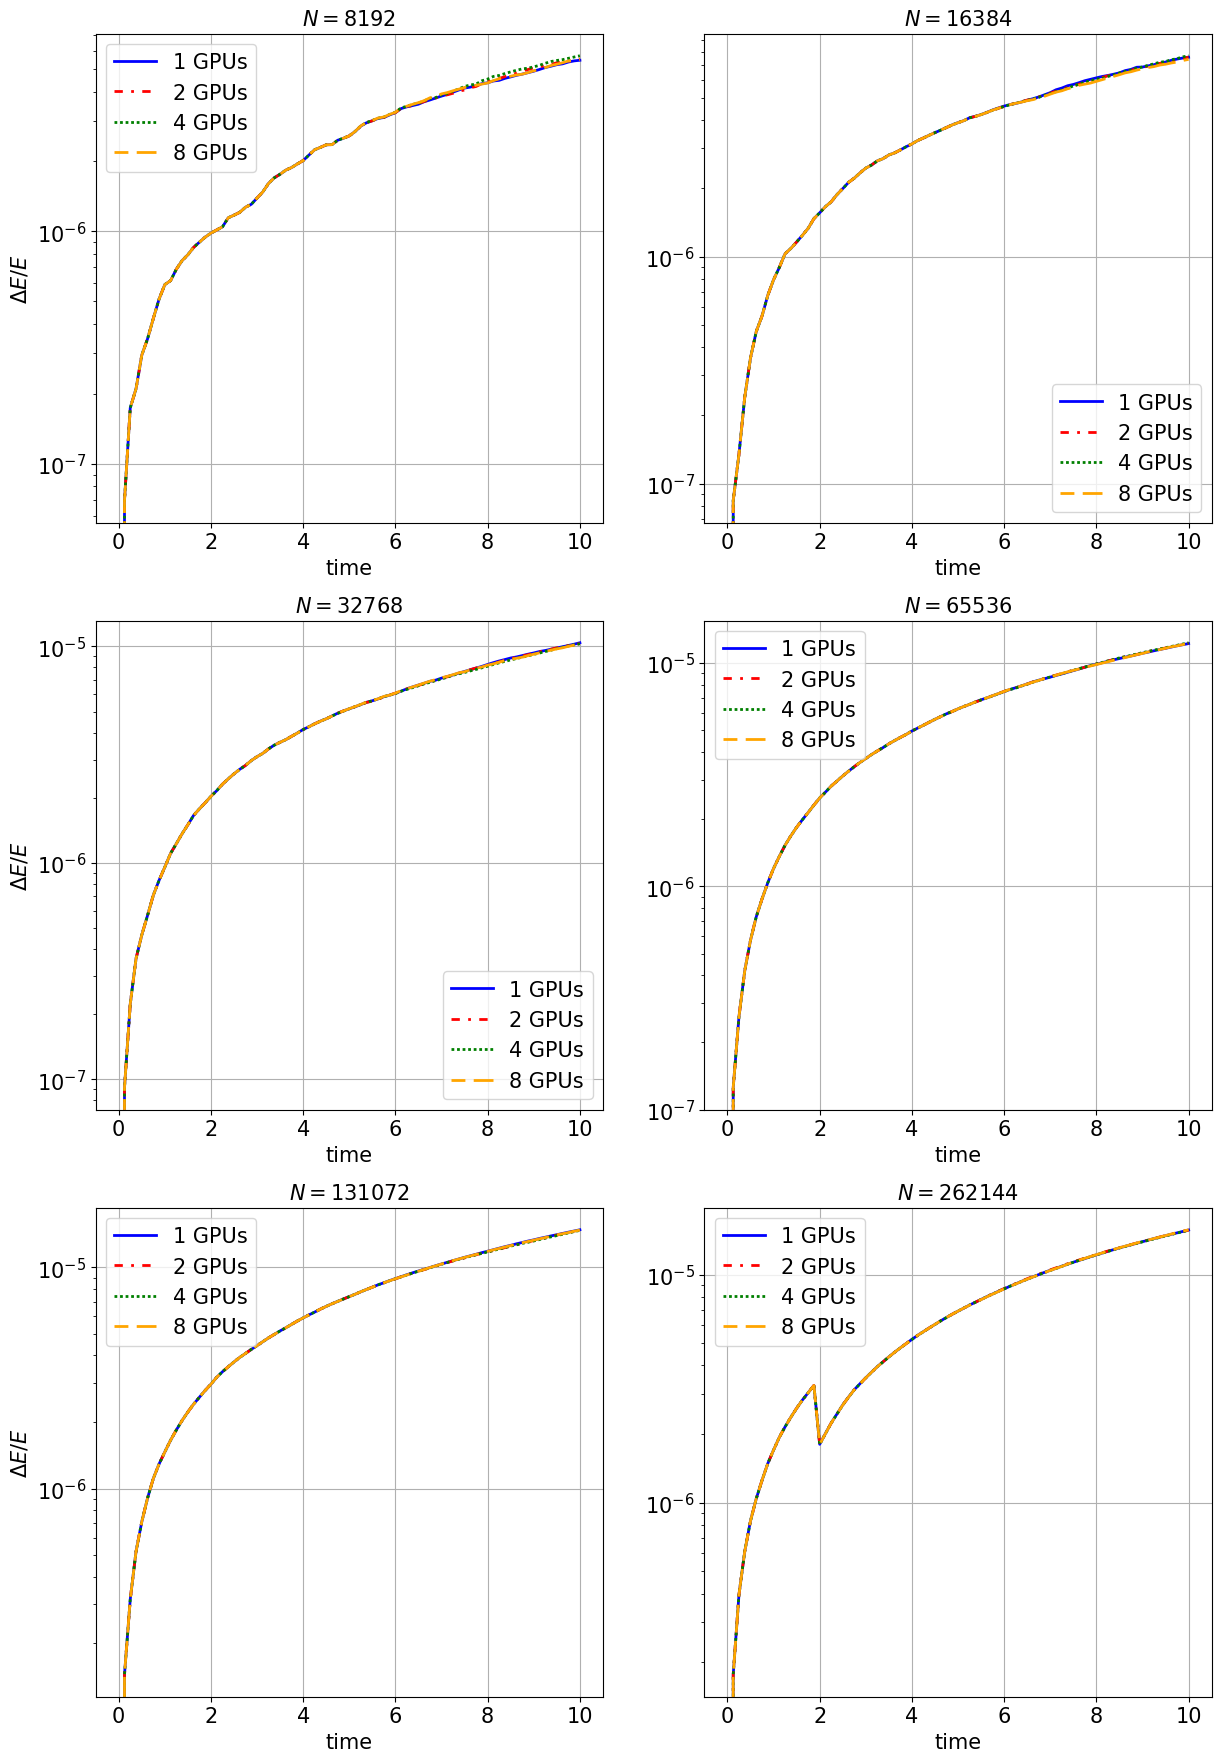

In [34]:
##########################################################################################################################
def plot_scal_N(i, ax, gpus, select):
    j = 0
    match select:
        case "ALL_no_overlap":
            for idx in no_overlap:
                _ = ax.plot(GPUN[gpus], lista[i][1][gpus,idx], linestyle=lin[j], linewidth=lw, color=col[j], label = profname[idx]); j+=1
        case "TOT_ANN_IF":
            _ = ax.plot(GPUN[gpus], lista[i][1][gpus,8], linestyle=lin[j], linewidth=lw, color=col[j], label = 'TOT'); j+=1
            _ = ax.plot(GPUN[gpus], lista[i][1][gpus,17]+lista[i][1][gpus,18], linestyle=lin[j], linewidth=lw, color=col[j], label = 'MPI'); j+=1
            #_ = ax.plot(GPUN[gpus], lista[i][1][gpus,17], linestyle=lin[j], linewidth=lw, color=col[j], label = 'MPI-red'); j+=1
            #_ = ax.plot(GPUN[gpus], lista[i][1][gpus,18], linestyle=lin[j], linewidth=lw, color=col[j], label = 'MPI-gat'); j+=1
            _ = ax.plot(GPUN[gpus], lista[i][1][gpus,3], linestyle=lin[j], linewidth=lw, color=col[j], label = 'ANN'); j+=1
            #_ = ax.plot(GPUN[gpus], lista[i][1][gpus,5], linestyle=lin[j], linewidth=lw, color=col[j], label = 'ANN-transfer'); j+=1
            _ = ax.plot(GPUN[gpus], lista[i][1][gpus,6], linestyle=lin[j], linewidth=lw, color=col[j], label = 'ANN-tree'); j+=1
            _ = ax.plot(GPUN[gpus], lista[i][1][gpus,7], linestyle=lin[j], linewidth=lw, color=col[j], label = 'ANN-search'); j+=1
            _ = ax.plot(GPUN[gpus], lista[i][1][gpus,4], linestyle=lin[j], linewidth=lw, color=col[j], label = 'I-forces'); j+=1
            _ = ax.plot(GPUN[gpus], lista[i][1][gpus,9], linestyle=lin[j], linewidth=lw, color=col[j], label = 'active_stars'); j+=1 #QUESTO NON SO PERCHè CI METTE COSI TANTO SU 2 NODI.... MISTERO
            #_ = ax.plot(GPUN[gpus], lista[i][1][gpus,16]+lista[i][1][gpus,5], linestyle=lin[j], linewidth=lw, color=col[j], label = 'memory'); j+=1
            #_ = ax.plot(GPUN[gpus], lista[i][1][gpus,14], linestyle=lin[j], linewidth=lw, color=col[j], label = 'N-forces'); j+=1
            #_ = ax.plot(GPUN[gpus], lista[i][1][gpus,11], linestyle=lin[j], linewidth=lw, color=col[j], label = 'predigpustor'); j+=1
            #_ = ax.plot(GPUN[gpus], lista[i][1][gpus,19], linestyle=lin[j], linewidth=lw, color=col[j], label = 'corrector'); j+=1
            #_ = ax.plot(GPUN[gpus], lista[i][1][gpus,16], linestyle=lin[j], linewidth=lw, color=col[j], label = 'EVAL-read'); j+=1
            #_ = ax.plot(GPUN[gpus], lista[i][1][gpus,22], linestyle=lin[j], linewidth=lw, color=col[j], label = 'Prints'); j+=1
            #_ = ax.plot(GPUN[gpus], lista[i][1][gpus,14]-lista[i][1][gpus,19], linestyle=lin[j], linewidth=lw, color=col[j], label = 'eva-MPI'); j+=1
        case "Iforce_scale":
            _ = ax.plot(GPUN[gpus], lista[i][1][0,4]/lista[i][1][gpus,4], linestyle=lin[j], linewidth=lw, color=col[j], label = 'I-forces'); j+=1
            #_ = ax.plot(GPUN[gpus], lista[i][1][0,8]/lista[i][1][gpus,8], linestyle=lin[j], linewidth=lw, color=col[j], label = 'TOT'); j+=1
            _ = ax.plot(GPUN[gpus], GPUN[gpus], linestyle=lin[j], linewidth=lw, color=col[j], label = 'Ideal Scal'); j+=1
        case "hermite_6th":
            _ = ax.plot(GPUN[gpus], lista[i][1][gpus,4],  linestyle=lin[j], linewidth=lw, color=col[j], label = 'I-forces'); j+=1
            _ = ax.plot(GPUN[gpus], lista[i][1][gpus,14], linestyle=lin[j], linewidth=lw, color=col[j], label = 'N-forces'); j+=1
            _ = ax.plot(GPUN[gpus], lista[i][1][gpus,2],  linestyle=lin[j], linewidth=lw, color=col[j], label = 'oldI-forces'); j+=1
            _ = ax.plot(GPUN[gpus], lista[i][1][gpus,11], linestyle=lin[j], linewidth=lw, color=col[j], label = 'predictor'); j+=1
            _ = ax.plot(GPUN[gpus], lista[i][1][gpus,19], linestyle=lin[j], linewidth=lw, color=col[j], label = 'corrector'); j+=1
            _ = ax.plot(GPUN[gpus], lista[i][1][gpus,20], linestyle=lin[j], linewidth=lw, color=col[j], label = 'update Dt'); j+=1
            _ = ax.plot(GPUN[gpus], lista[i][1][gpus,16]+lista[i][1][gpus,5], linestyle=lin[j], linewidth=lw, color=col[j], label = 'memory'); j+=1
        case "errors":
            for gp_idx in gpus:
                _ = ax.plot(lista[i][0][gp_idx][:,0], lista[i][0][gp_idx][:,1], linestyle=lin[j], linewidth=lw, color=col[j], label = '%d GPUs'%GPUN[gp_idx]); j+=1
                #_ = ax.plot(lista[i][0][gp_idx][:,0]*t_units[i], lista[i][0][gp_idx][:,1], linestyle=lin[j], linewidth=lw, color=col[j], label = '%d GPUs'%GPUN[gp_idx]); j+=1
            
    if(select!="errors"):        
        #_ = ax.set_yscale("log", base=10)
        _ = ax.set_xlabel(r'$N_{GPU}$', fontsize=fs)
        if(i%2==0):
            if(select == "Iforce_scale"):
                _ = ax.set_ylabel(r'time(1 GPU) / time', fontsize=fs)
            else:
                _ = ax.set_ylabel(r'time [s]', fontsize=fs)
        _ = ax.set_xticks(ticks=GPUN[gpus])
    else:
        _ = ax.set_yscale("log", base=10)
        _ = ax.set_xlabel(r'time', fontsize=fs)
        #_ = ax.set_xlabel(r'time [Myr]', fontsize=fs)
        if(i%2==0):
            _ = ax.set_ylabel(r'$\Delta E/E$', fontsize=fs)
    _ = ax.legend(fontsize=fs)
    _ = ax.set_title(r'$N=%d$'%Ns[i],fontsize=fs)
    _ = ax.tick_params(axis='both', labelsize=fs)
    _ = ax.grid()
##########################################################################################################################

no_overlap=[8,1,9,11,12,19,20,21,22]
#select = "ALL_no_overlap"
#select = "TOT_ANN_IF"
#select = "Iforce_scale"
#select = "hermite_6th"
select = "errors"

gpus = [0,1,2,3] #seleziona che elemtni di GPUN vuoi includere nel plot 
COL = 2 ; RIG = 3
fig = plt.figure(666, figsize=[n*4.8*COL,n*4.8*RIG])
gs = fig.add_gridspec(RIG,COL)#, hspace=0)
axs = gs.subplots()#sharex=True, sharey=True)
off = 2 #salto 2048 e 4096
if(RIG > 1):
    for i in range(RIG*COL):
        plot_scal_N(i+off, axs[int(i/COL),i%COL], gpus, select) 
else:
    for i in range(RIG*COL):
        plot_scal_N(i+off, axs[i%COL], gpus, select) 
if(SAVE):
    _ = plt.savefig(direc+select+".pdf", bbox_inches='tight', format='pdf')
    _ = plt.show(True)

/home/mmencagl/tests/isteddas_tests/hermite_6th.pdf


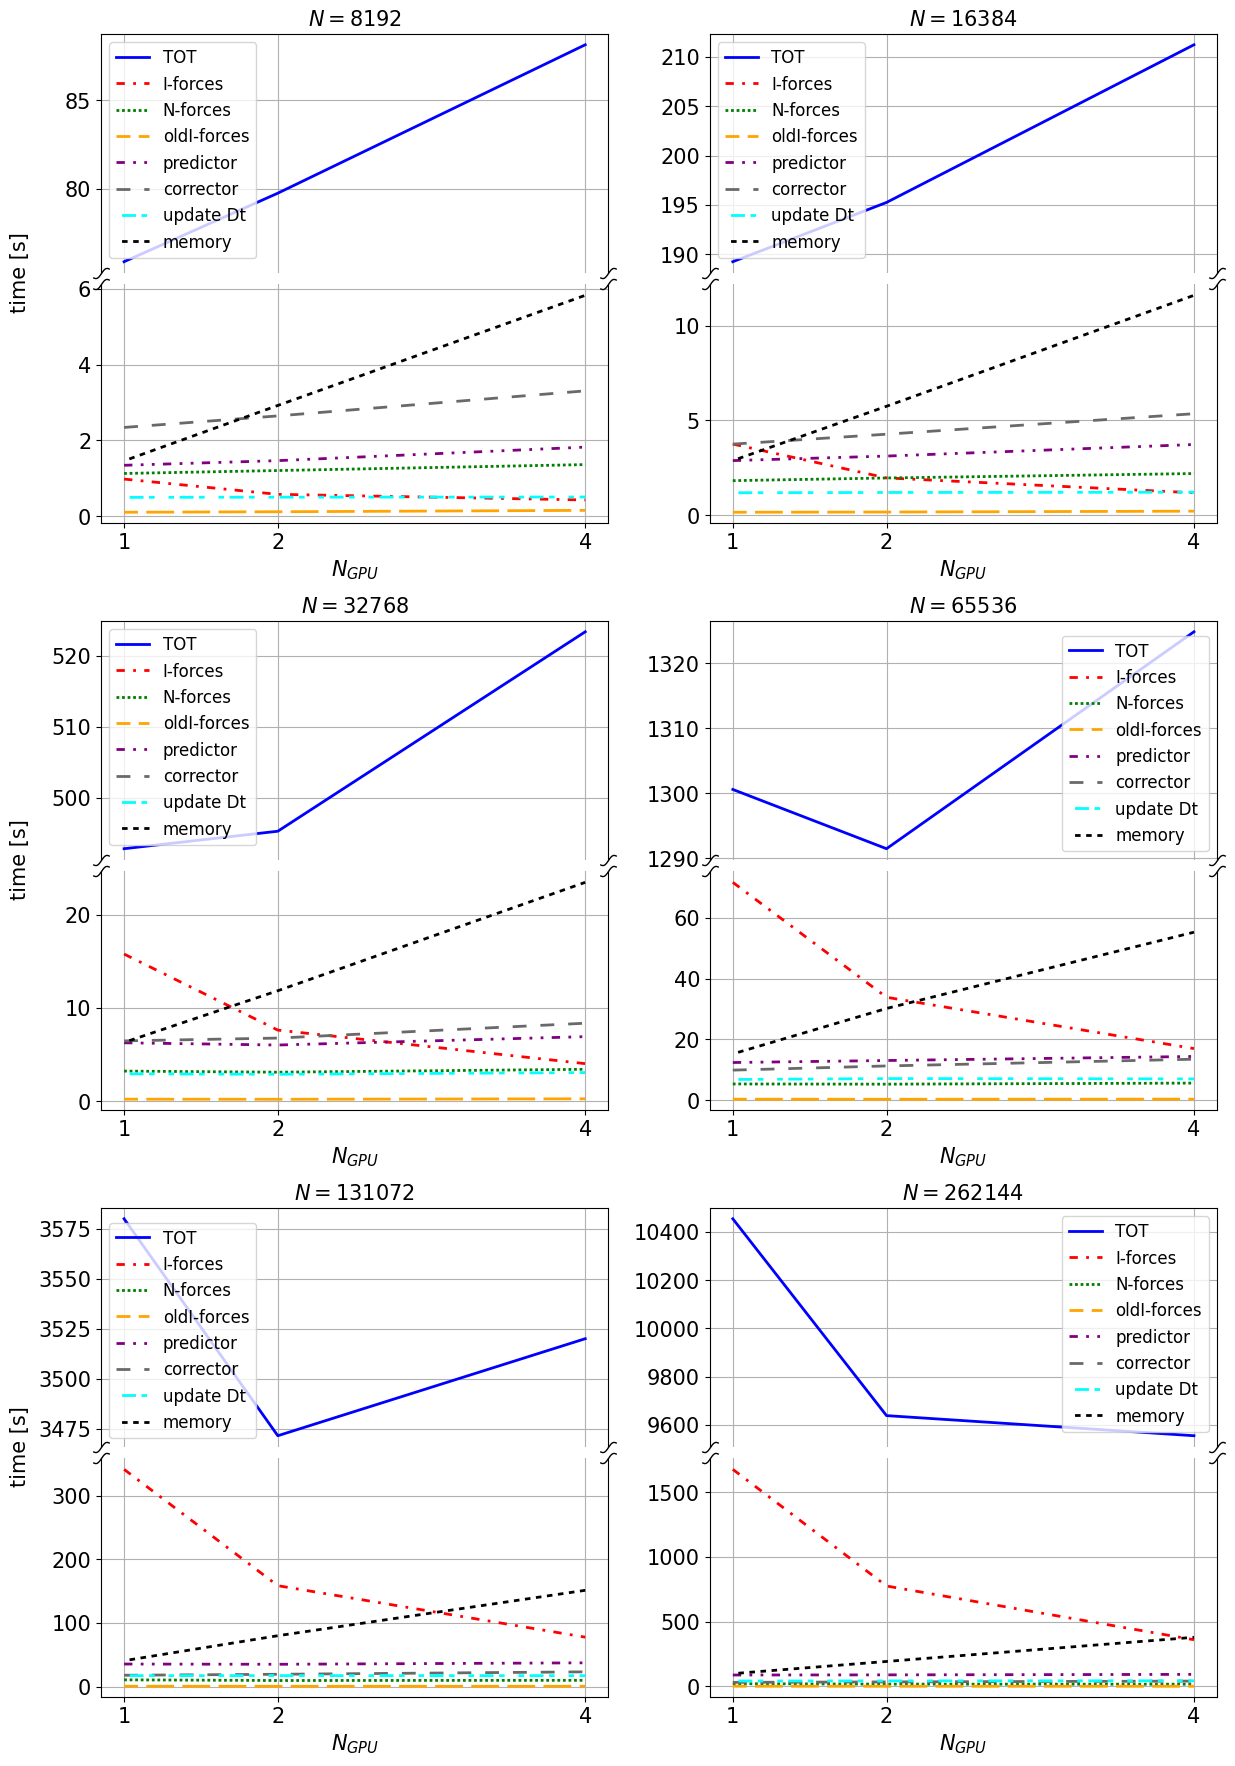

In [20]:
##########################################################################################################################
def triang_func(x): return np.abs(x - np.floor(x + 0.5))
def triang_scal_func(x): return (x - np.floor(x + 0.5))
def sin_func(x): return (np.sin(x) + 0.5*x)
def plot_scal_N(i, ax, gpus, select):
    j = 0
    ax1 = ax[0]; ax2 = ax[1]
    match select:
        case "hermite_6th":
            _ = ax1.plot(GPUN[gpus], lista[i][1][gpus,8], linestyle=lin[j], linewidth=lw, color=col[j], label = 'TOT'); j+=1
            _ = ax2.plot(GPUN[gpus], lista[i][1][gpus,4],  linestyle=lin[j], linewidth=lw, color=col[j], label = 'I-forces'); j+=1
            _ = ax2.plot(GPUN[gpus], lista[i][1][gpus,14], linestyle=lin[j], linewidth=lw, color=col[j], label = 'N-forces'); j+=1
            _ = ax2.plot(GPUN[gpus], lista[i][1][gpus,2],  linestyle=lin[j], linewidth=lw, color=col[j], label = 'oldI-forces'); j+=1
            _ = ax2.plot(GPUN[gpus], lista[i][1][gpus,11], linestyle=lin[j], linewidth=lw, color=col[j], label = 'predictor'); j+=1
            _ = ax2.plot(GPUN[gpus], lista[i][1][gpus,19], linestyle=lin[j], linewidth=lw, color=col[j], label = 'corrector'); j+=1
            _ = ax2.plot(GPUN[gpus], lista[i][1][gpus,20], linestyle=lin[j], linewidth=lw, color=col[j], label = 'update Dt'); j+=1
            _ = ax2.plot(GPUN[gpus], lista[i][1][gpus,16]+lista[i][1][gpus,5], linestyle=lin[j], linewidth=lw, color=col[j], label = 'memory'); j+=1
            
    #_ = ax.set_yscale("log", base=10)
    _ = ax2.set_xlabel(r'$N_{GPU}$', fontsize=fs)
    if(i%2==0):
        _ = ax1.set_ylabel(r'time [s]', fontsize=fs)
        _ = ax1.yaxis.set_label_coords(-0.14,0)
        #_ = ax2.set_ylabel(r'time [s]', fontsize=fs)
    _ = ax2.set_xticks(ticks=GPUN[gpus])
    handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
    _ = ax1.legend(handles, labels, fontsize=fss)
    #_ = ax2.legend(fontsize=fss)
    _ = ax1.set_title(r'$N=%d$'%Ns[i],fontsize=fs)
    _ = ax1.tick_params(axis='both', labelsize=fs)
    _ = ax2.tick_params(axis='both', labelsize=fs)
    _ = ax1.grid()
    _ = ax2.grid()
    _ = ax1.spines.bottom.set_visible(False)
    _ = ax2.spines.top.set_visible(False)
    _ = ax1.xaxis.tick_top()
    _ = ax1.tick_params(top=False, labeltop=False)  # don't put tick labels at the top
    #x = np.linspace(-1,1,100); y = triang_func(x); mark = [i for i in zip(x,y)]
    x = np.linspace(-np.pi,np.pi,20); y = sin_func(x); mark = [i for i in zip(x,y)]
    #mark = [(-1, -0.5), (1, 0.5)]
    kwargs = dict(marker=mark, markersize=12, linestyle="none", color='w', mec='k', mew=1, clip_on=False)
    _ = ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
    _ = ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
##########################################################################################################################
    
select = "hermite_6th"

gpus = [0,1,2] #seleziona che elemtni di GPUN vuoi includere nel plot 
COL = 2 ; RIG = 3
off = 2 #salto 2048 e 4096
fig = plt.figure(666, figsize=[n*4.8*COL,n*4.8*RIG])
gs = fig.add_gridspec(RIG,COL)#, hspace=0)
axs = []
for j in range(RIG):
    axs.append([])
    for i in range(COL):
        gs_tmp = gs[j,i].subgridspec(2, 1, hspace=0.05)
        axs[j].append(gs_tmp.subplots(sharex=True))

for i in range(RIG*COL):
    plot_scal_N(i+off, axs[int(i/COL)][i%COL],  gpus, select) 
if(SAVE):
    _ = plt.savefig(direc+select+".pdf", bbox_inches='tight', format='pdf')
    _ = plt.show(True)

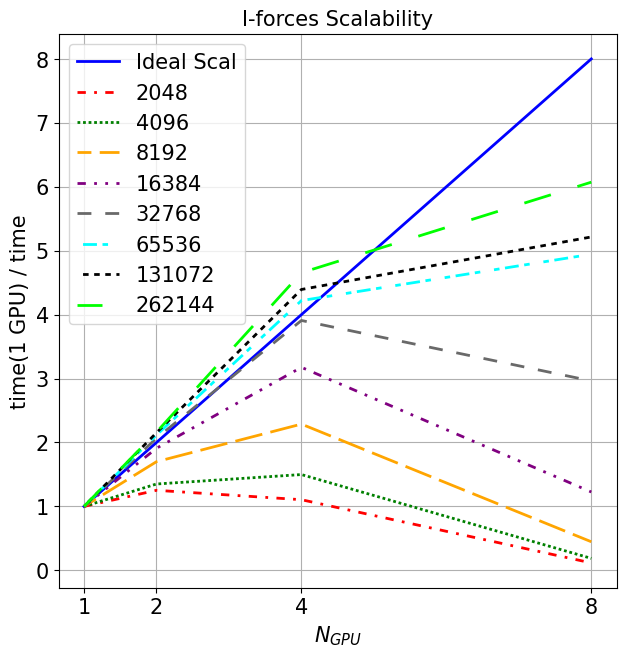

In [46]:
def plot_scal(i,off,sel):
    if(sel=="scalings"):
        _ = ax.plot(GPUN, GPUN, linestyle=lin[0], linewidth=lw, color=col[0], label = 'Ideal Scal')
    for i in range(off,len(Ns)):
        match sel:
            case "comparison":
                lab = '%d ($2^{%d}$)'%(Ns[i],np.log2(Ns[i]))
                _ = ax.plot(GPUN, np.array(lista[i][1][:,4]) / np.array(lista[off][1][:,4]), linestyle=lin[0], linewidth=lw, color=col[i], label=lab)
                # _ = ax.plot(GPUN, lista[i][1][:,19], linestyle=lin[1], linewidth=lw, color=col[1], label = 'MPI')
                # _ = ax.plot(GPUN, (lista[i][1][:,9]-lista[i][1][:,19])/ lista[i][1][3,9], linestyle=lin[1], linewidth=lw, color=col[i])#, label = 'TOT-MPI %d'%Ns[i])
                # _ = ax.plot(GPUN, lista[i][1][:,11], linestyle=lin[3], linewidth=lw, color=col[3], label = 'advancestep')
                _ = ax.set_yscale("log", base=2)
            case "scalings":
                _ = ax.plot(GPUN[gpus], lista[i][1][0,4]/lista[i][1][:,4], linestyle=lin[i+1], linewidth=lw, color=col[i+1], label = '%d'%Ns[i])
                #_ = ax.plot(GPUN[gpus], lista[i][1][0,8]/lista[i][1][gpus,8], linestyle=lin[j], linewidth=lw, color=col[j], label = 'TOT')

    _ = ax.set_xlabel(r'$N_{GPU}$', fontsize=fs)
    match sel:
        case "comparison":
            _ = ax.set_ylabel(r'time / time(N=%d)'%Ns[off], fontsize=fs)
        case "scalings":
            _ = ax.set_ylabel(r'time(1 GPU) / time', fontsize=fs)
    _ = ax.set_xticks(ticks=GPUN)
    _ = ax.legend(fontsize=fs)
    _ = ax.set_title(r'I-forces Scalability',fontsize=fs)
    _ = ax.tick_params(axis='both', labelsize=fs)
    _ = ax.grid()


#sel="comparison"
sel="scalings"

fig = plt.figure(999, figsize=[n*4.8,n*4.8])
ax = fig.subplots()#sharex=True, sharey=True)
plot_scal(ax, 0, sel)

if(SAVE):
    _ = plt.savefig(direc+"I-forces_scal_singleplot.pdf", bbox_inches='tight', format='pdf')
    _ = plt.show(True)

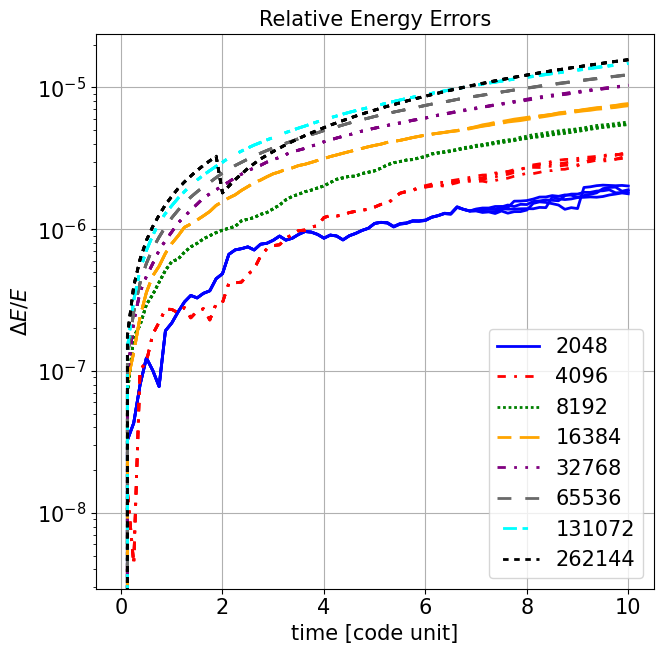

In [38]:
def plot_err(i,off):
    for i in range(off,len(Ns)):
        gp_idx = 0
        _ = ax.plot(lista[i][0][gp_idx][:,0], lista[i][0][gp_idx][:,1], linestyle=lin[i], linewidth=lw, color=col[i], label="%d"%Ns[i])
        for gp_idx in range(1,len(GPUN)):
            _ = ax.plot(lista[i][0][gp_idx][:,0], lista[i][0][gp_idx][:,1], linestyle=lin[i], linewidth=lw, color=col[i])
    _ = ax.set_yscale("log", base=10)
    _ = ax.set_xlabel(r'time [code unit]', fontsize=fs)
    _ = ax.set_ylabel(r'$\Delta E/E$', fontsize=fs)
    _ = ax.legend(fontsize=fs)
    _ = ax.set_title(r'Relative Energy Errors',fontsize=fs)
    _ = ax.tick_params(axis='both', labelsize=fs)
    _ = ax.grid()
        
fig = plt.figure(567, figsize=[n*4.8,n*4.8])
ax = fig.subplots()#sharex=True, sharey=True)
plot_err(ax, 0)

if(SAVE):
    _ = plt.savefig(direc+"err1plot.pdf", bbox_inches='tight', format='pdf')
    _ = plt.show(True)